# <center> 1. Введение

К обучению без учителя можно отнести:
- Методы кластеризации. Они позволяют разделить объекты на группы, внутри которых объекты максимально похожи друг на друга.
- Методы понижения размерности. С их помощью можно уменьшить число признаков, которые характеризуют объект. Обычно количество признаков уменьшают до двух-трёх для дальнейшей визуализации данных или использования при обучении моделей.
- Методы ассоциации. Они используются для того, чтобы найти правила и законы, по которым существует последовательность действий.

КАКИЕ ПРОБЛЕМЫ МОЖНО РЕШАТЬ С ПОМОЩЬЮ МЕТОДОВ ОБУЧЕНИЯ БЕЗ УЧИТЕЛЯ?
- разделять данные на группы, которые схожи по каким-то признакам.
- уменьшить объём данных, убрав схожие данные и оставив только несколько представителей различных групп.
- Методы уменьшения размерности помогают уменьшить количество признаков, которые характеризуют объект, и ускорить обучение модели.
- Некоторые методы кластеризации помогают найти выбросы в данных.
- Методы ассоциации позволяют создавать шаблоны. Это может помочь правильно расставить товары на полках в магазине или спрогнозировать продукты, которые могут купить вместе

# <center> 2. Введение в обучение без учителя. Базовая кластеризация

Кластеризация позволяет разбить объекты на группы, которые называются кластерами. у каждого кластера есть центроид. Центроид — это центр масс кластера, или среднее значение координат объектов кластера. для нахождения центроида мы берём все значения по каждому признаку и считаем среднее.

### АЛГОРИТМ K-MEANS

Идея алгоритма состоит в том, что он разбивает множество элементов векторного пространства на заранее заданное пользователем число кластеров, а далее стремится минимизировать суммарное квадратичное отклонение объектов внутри кластера до центроида кластера.
Математически это выглядит
V = summa(summa(x-mu)**2)
Мы итерируемся по каждому кластеру и для всех векторов x внутри кластера Si подсчитываем центроиды (mui). Далее рассчитываем разницу между каждым вектором x кластера Si и центроидом кластера Si. Необходимо, чтобы это значение, возведённое в квадрат (), было минимальным для каждого кластера.

Алгоритм k-means состоит из девяти шагов. 
1. Решаем, на сколько кластеров хотим разделить данные.
2. Чтобы сформировать кластеры, случайным образом выбираем "несколько" объектов из датасета. 
3. Распределим оставшиеся объекты датасета по трём кластерам. Считается, что объект принадлежит к тому кластеру, к центроиду которого он находится ближе всего.
4. в каждом из кластеров больше одного объекта, и центр этих кластеров тоже изменился. Поэтому рассчитаем новые центроиды
5. После этого для каждого объекта в выборке повторяем шаг 3, т. е. для каждого объекта датасета рассчитываем расстояние до центроидов:
6. Шаг 5 повторяется до тех пор, пока объекты датасета не перестанут менять кластеры, к которым они относятся. Как только объекты перестают это делать, алгоритм завершается и мы переходим к шагу 7.
7. Далее для каждого кластера подсчитаем среднеквадратичное отклонение объектов кластера до центроида: для каждого кластера считаем сумму квадратов расстояний от элементов кластера до его центроида.
8. Далее мы несколько раз заново запускаем алгоритм кластеризации, начиная с шага 2.
9. Среди получившихся кластеров нам необходимо найти наилучший вариант кластеризации. Лучшей будет признана кластеризация с минимальным значением среднеквадратичного отклонения, которое рассчитывали на шаге 7

несколько вариаций алгоритма k-means:
- K-MEANS. Находит центроиды кластера как среднее значение координат. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html (init='random')
- K-MEANS++. В классическом алгоритме k-means центроиды выбираются случайно, но это может приводить к тому, что два объекта, которые находятся близко друг к другу, будут центроидами двух разных кластеров — это будет приводить к долгой работе алгоритма. (init='k-means++')
- K-MEDIANS. На этапе поиска центроидов кластера находит не среднее значение координат, а медиану. https://github.com/UBC-MDS/KMediansPy
- K-MEDOIDS. Работает так же, как k-medians, но медианой кластера будет не какая-то точка в кластере, а объект, который находится ближе всего к этим координатам медианы кластера. https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html
- FUZZY C-MEANS. Данный алгоритм разрешает нечётко присваивать кластеры. Каждый объект может принадлежать к разным кластерам с разной вероятностью. https://github.com/omadson/fuzzy-c-means

In [ ]:
# пример
# импортируем нужный модуль k-means-кластеризации
from sklearn.cluster import KMeans

# инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
X = df[["x1", "x2", "x3"]]
# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X)
# получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_

параметры кластеризации
- n_clusters — количество кластеров. По умолчанию — 8.
- init — способ инициализации центроидов. Есть две опции: random (выбирает центроиды случайным образом) и k-means++ (более «хитрый» алгоритм, который позволяет модели быстрее сходиться). По умолчанию используется k-means++.
- n_init — количество случайных инициализаций алгоритма k-means. В конце будут выбраны те результаты, которые имеют наилучшие значения критерия k-means. По умолчанию n_init = 10.
- max_iter — максимальное количество итераций алгоритма k-means при одном запуске. По умолчанию — 300.
- random_state — параметр, который определяет генерацию случайных чисел для инициализации центроида. 

<AxesSubplot:xlabel='cluster', ylabel='silhouette'>

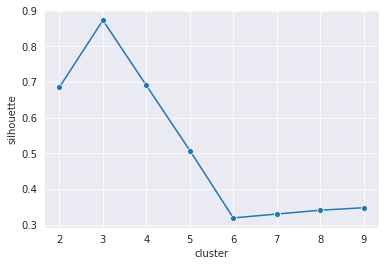

In [13]:
# Задание 2.7 поступили показания с прибора, измеряющего количество нитратов и пестицидов в разных фруктах и овощах.
# Значения количества пестицидов и нитратов записаны в столбцы с названиями x1 и x2. кластеризуйте данные, найдите оптимальное количество кластеров используя коэффициент силуэта
# добавляем третий признак - скорость покемона, а алгоритм такой же
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

df = pd.read_csv('/home/aleksandr/Документы/GitHub/data/ML4/values_from_the_instrument.csv')

def get_silhouette(cluster_num, df):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(df)
    silhouette = silhouette_score(df, k_means.labels_, metric='euclidean')
    return silhouette

silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, df))
    silhouette_res["cluster"].append(cluster_num)
    
silhouette_df = pd.DataFrame(silhouette_res)

sns.set_style("darkgrid")
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

# <center> 3. Метрики

Существует ряд метрик, которые можно подсчитать, если данные размечены. Мы рассмотрим четыре метрики:

1. ОДНОРОДНОСТЬ КЛАСТЕРОВ (HOMOGENEITY SCORE) (Q)
Кластер считается однородным, если в нём содержатся объекты, принадлежащие только к одному кластеру. Значение метрики уменьшается, если объединить два разных кластера, которые содержат непохожие объекты. Максимум - 1. Если бы кластер был максимально неоднородный, значение метрики было бы равно 0.

In [11]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

1.0
0.737175493807016


2. ПОЛНОТА КЛАСТЕРА (COMPLETENESS SCORE) (С)
Значение данной метрики показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру.
При максимальном заполнении кластеров схожими объектами полнота равняется 1, при минимальном заполнении — 0.

In [6]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы, подсчитываем метрику
completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1])

1.0

3. V-МЕРА (V-MEASURE) - комбинация метрик полноты и однородности.
Значение V-меры варьируется от 0 до 1. Метрика будет равна 1 только в том случае, если кластеры будут однородными и полными одновременно. 0 — полученные кластеры неоднородные, количество кластеров слишком большое. Данную метрику можно вычислять, когда одновременно важны и наполненность кластеров, и их однородность.

v = (1+beta)*homogeneity*completeness/(beta*homogeneity*completeness)

По умолчанию beta = 1, но это значение можно варьировать, если хочется дать разный вес разным свойствам.
- Если однородность кластеров важнее, чем их полнота, следует указать значение beta<1. Тогда значение beta*homogeneity в знаменателе получится небольшим и тем самым будет сильнее влиять на значение v. Чем меньше beta*homogeneity, тем выше v.
- Если однородность кластеров не особо важна, но важно, чтобы каждый кластер содержал максимальное количество похожих объектов, тогда мы регулируем значение beta так, чтобы beta>1.

In [7]:
from sklearn.metrics import v_measure_score

4. ИНДЕКС РЭНДА
Данный индекс сравнивает предсказанный датасет и размеченные данные и подсчитывает, сколько образовалось пар объектов, которые оказались в одном кластере (number of agreeing pairs), среди предсказанных и размеченных данных. данная метрика подсчитывает, для какой доли объектов датасета мы правильно определили кластер. 1 — все объекты в предсказанном кластере попали в правильные кластеры.

Rand Index = number of agreeing pairs / number of pairs

In [10]:
from sklearn.metrics.cluster import rand_score
# передаём в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])

1.0

# <center> 4. Иерархическая кластеризация

Принцип иерархической кластеризации основан на построении дерева (иерархии) вложенных кластеров. При иерархической кластеризации строится дендрограмма. 
Дендрограмма  — это древовидная диаграмма, которая содержит n уровней. Каждый уровень — это шаг укрупнения кластеров.
при иерархической кластеризации выделяют два подхода: агломеративный и дивизионный. В первом случае (Агломеративный метод (agglomerative)) кластеры образуются снизу вверх, т. е. при объединении кластеров, а во втором (Дивизионный (дивизивный) метод (divisive)) — сверху вниз, в ходе деления крупных кластеров.

Для того чтобы построить дендрограмму, нужна матрица сходства, построенная на основе расстояний между кластерами.
Методы определения расстояния между кластерами:
1. Метод одиночной связи (single linkage). Поиск минимального расстояния между объектами из разных кластеров.
2. Метод полной связи (complete (maximum) linkage). Поиск максимального расстояния между объектами из разных кластеров.
3. Метод средней связи (pair group method using arithmetic mean). Расстояние между двумя кластерами считается как среднее от расстояния между двумя элементами этих кластеров.
4. Центроидный метод (centroid). Расстояния между кластерами рассчитываются как расстояния между центроидами этих кластеров.

Метод одиночной связи хорошо отрабатывает на первых двух распределениях датасетов, но очень плохо справляется с вытянутыми и перекрывающимися данными. Алгоритм иерархической кластеризации работает по принципу «богатый становится богаче». Это может приводить к неравномерному распределению кластеров. Данный способ больше других страдает от неравномерного распределения кластеров

Использование методов средней связи и полной связи приносит хорошие результаты только при условии, что данные имеют высокую плотность и не пересекаются, или же для однородно распределённых данных. В остальных случаях они отрабатывают плохо.

ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ?
- Для построения филогенетического дерева.
- Для анализа текстов.

Базовые параметры AgglomerativeClustering:
- n_clusters — количество кластеров; по умолчанию — 2.
- linkage — метод определения расстояния между кластерами. Можно выбрать single, ward, average, complete; по умолчанию используется ward.

ПРЕИМУЩЕСТВА И НЕДОСТАТКИ ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ
+ Можно построить дендрограмму и понять, как устроены данные.
+ Работает на небольшом датасете.
- Необходимость выбора оптимального количества кластеров.
- Если данных много, дендрограмма становится большой и сложной для понимания.
- Может неравномерно разделять данные на кластеры.

In [1]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

df = pd.read_csv('/home/aleksandr/Документы/GitHub/data/ML4/pokemon.csv')
X = df[['Attack', 'Defense']]

agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
agglomerative_clustering.fit(X)
#agglomerative_clustering.labels_

AgglomerativeClustering()

# <center> 5. EM-алгоритмы кластеризации

В основе данного подхода лежит предположение, что любой объект принадлежит ко всем кластерам, но с разной вероятностью.
Один из примеров EM (Expectation-maximization)-алгоритма — это k-means-кластеризация
Алгоритм состоит из двух шагов. Если рассмотреть их на примере k-means, то:
- на шаге E мы вычисляем, к какому кластеру будет относиться объект на основании расстояний до центроида;
- на шаге M мы пересчитываем центроиды кластеров.

Когда данные распределены в форме вытянутых эллипсов (см. график ниже), алгоритм k-means не справляется с кластеризацией. В качестве альтернативы можно взять ещё один из алгоритмов EM-кластеризации — модель гауссовой смеси (Gaussian Mixture Model, GMM), в котором данные описываются функцией Гаусса. Это значит, что мы можем выделить два параметра для описания кластеров: среднее значение и стандартное отклонение. 

ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ EM-КЛАСТЕРИЗАЦИЯ?
- K-means-кластеризацию можно использовать для кластеризации документов по разным категориям, основываясь на тегах, заголовках или содержимом документа. Для этого текст документа представляется в виде вектора, а далее используется в кластеризации. Если у разных документов похожие векторы, их можно объединить в одну группу.
- GMM можно использовать для сегментации изображений, например чтобы находить опухоли на снимках МРТ. Для этого мы представляем изображение в виде вектора и далее используем такое представление снимка в кластеризации.
- Используя GMM, можно анализировать временные ряды цен в периоды действия акций.

In [2]:
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42) # n_components — количество кластеров.

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

ПРЕИМУЩЕСТВА И НЕДОСТАТКИ EM-КЛАСТЕРИЗАЦИИ

+ Кластеры, которые находит этот алгоритм, могут принимать форму эллипса, а не ограничиваться окружностями. K-Means является частным случаем GMM.
+ Если объект находится в середине двух перекрывающихся кластеров, то, в отличие от k-means, не нужно решать, к какому кластеру он принадлежит: объект может принадлежать к двум разным кластерам с разной вероятностью.
- Нужно задавать количество кластеров.
- Чувствителен к тому, с какой точки начинается алгоритм.
- Может медленно сходиться, т. е. искать, как оптимально описать кластеры.

<AxesSubplot:xlabel='year', ylabel='price'>

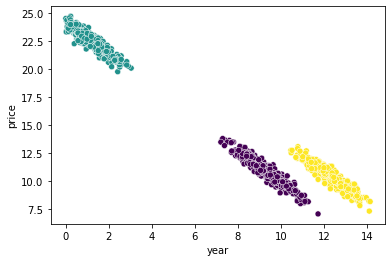

In [16]:
# Задание 5.4
import pandas as pd
from sklearn.mixture import GaussianMixture
import seaborn as sns

df = pd.read_csv('/home/aleksandr/Документы/GitHub/data/ML4/housing.csv')
gaussian_clustering = GaussianMixture(n_components=3)

predictions = gaussian_clustering.fit_predict(X=df[['year', 'price']])
sns.scatterplot(x=df.year, y=df.price, c=predictions)

<AxesSubplot:xlabel='year', ylabel='price'>

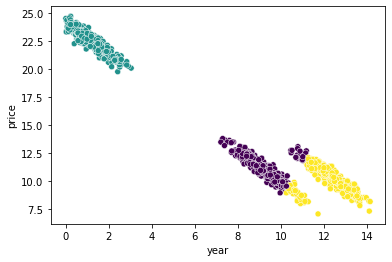

In [17]:
# Задание 5.5
from sklearn.cluster import KMeans
kmeans_clustering = KMeans(n_clusters=3)
# обучим модель кластеризации и предскажем кластеры для наших данных
predictions_kmeans = kmeans_clustering.fit_predict(X=df[['year', 'price']])
# визуализируем результаты
sns.scatterplot(x=df.year, y=df.price, c=predictions_kmeans)

# <center> 6. Спектральная кластеризация

Данный тип кластеризации использует собственные значения (спектр) матрицы сходства данных, чтобы снизить размерность данных и далее провести кластеризацию.
Алгоритм спектральной кластеризации состоит из четырёх шагов:
1. На первом шаге мы создаём граф, количество вершин которого равняется количеству объектов в датасете. Рёбра графа, соединяющие две вершины, будут содержать информацию о схожести двух объектов, находящихся в вершине. Информацию о схожести вершин записываем в матрицу, строки и столбцы которой — это вершины, а в ячейку записана схожесть двух вершин
2. После этого проводим некоторые математические преобразования этой матрицы. Это нужно для того, чтобы далее мы могли описать вершину графа не шестью признаками, а всего одним:
3. Далее уменьшаем размерность данных.
4. Далее проводим кластеризацию матрицы с уменьшенной размерностью.

Данный метод широко используется для сегментации изображений. В данном случае вершины графа — это пиксели изображения.

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

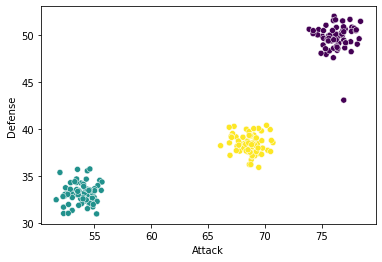

In [22]:
from sklearn.cluster import SpectralClustering

df = pd.read_csv('/home/aleksandr/Документы/GitHub/data/ML4/pokemon.csv')
X = df[['Attack', 'Defense']]

spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
spectral_predictions = spectral_clustering.labels_
sns.scatterplot(x=df.Attack, y=df.Defense, c=spectral_predictions)

ПРЕИМУЩЕСТВА И НЕДОСТАТКИ СПЕКТРАЛЬНОЙ КЛАСТЕРИЗАЦИИ:
+ Подходит для кластеризации данных с большим количеством признаков, так как использует технику понижения размерности.
+ Эффективна для кластеризации разрежённых данных.
+ Хорошо работает на практически любых распределениях данных. 
- Нужно заранее задавать количество кластеров.
- Подходит для задач сбалансированной классификации, то есть количество точек между кластерами не сильно отличается.
- Не справляется с выбросами и не выделяет их в отдельный кластер

# <center> 7. Кластеризация на основе плотности

Такая кластеризация находит в датасете области с высокой плотностью и на их основе образует кластеры. Редкие объекты, которые находятся в отдалении от других данных и для которых нужен отдельный кластер, считаются шумом.

При кластеризации на основе плотности нам не нужно задавать количество кластеров — алгоритм сам определяет оптимальное число. Такой алгоритм кластеризации отлично справляется с выбросами и с данными произвольной формы.

### DBSCAN (DENSITY-BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE)

алгоритм применим, если:
- перед вами стоит задача с данными сложной формы, например выделение районов на карте:
- в данных большое количество выбросов, например данные медицинских анализов пациентов.

Преимущества алгоритма DBSCAN:
+ В отличие от k-means, не нужно задавать количество кластеров — алгоритм сам определит оптимальное.
+ Алгоритм хорошо работает с данными произвольной формы.
+ DBSCAN отлично справляется с выбросами в датасетах.

алгоритм кластеризации DBSCAN:
1. Сначала необходимо выбрать случайный объект в данных (на рисунке выбранная точка выделена красным) и в некотором радиусе r от этой точки найти всех соседей. 
2. Выделим центральные точки (core points). Центральными будут считаться точки, вокруг которых находится три или более объектов. Данное значение обычно задаётся пользователем.
3. Среди центральных точек выберем случайным образом одну и примем, что эта точка относится к первому кластеру. Далее найдём все центральные точки, находящиеся в заданном радиусе от этой точки
4. После того как центральные точки в первом кластере заканчиваются, мы начинаем находить нецентральные точки, которые располагаются в радиусе r от объектов, принадлежащих первому кластеру
5. Далее переходим к неразмеченной области в данных. Заново повторяем алгоритм, начиная с пункта 3, и в итоге получаем второй kластер. Точки, которые не имеют соседей в заданном радиусе, считаются выбросами и не принадлежат ни к одному кластеру.

ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ DBSCAN?
- Можно использовать DBSCAN для разработки системы рекомендаций в магазине.
- Данный алгоритм успешно справляется с поиском выбросов в данных. 
- для кластеризации геоданных, так как он может выделять данные сложной формы.

/home/aleksandr/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

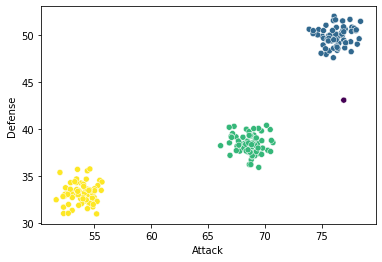

In [23]:
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])
# Основные параметры для запуска DBSCAN: eps — это радиус, про который мы говорили выше, когда рассматривали алгоритм.
# Если данные разряжённые, значение радиуса должно быть больше. Если же данные расположены довольно близко друг к другу, значение радиуса можно уменьшить.
#min_samples — задаёт необходимое количество точек, которое должно быть в заданном радиусе от точки, чтобы она считалась центральной.

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(df.Attack, df.Defense, c=clustering.labels_)

ПРЕИМУЩЕСТВА И НЕДОСТАТКИ DBSCAN
+ Не нужно задавать количество кластеров.
+ Устойчив к шуму и выбросам, может находить выбросы в данных.
+ Способен найти кластеры любой геометрической формы.
- Не может качественно кластеризовать наборы данных с большой разницей в плотности.
- Равноудалённые от двух кластеров объекты могут быть отнесены к тому кластеру, с которого алгоритм начал работать, что не всегда оказывается верным.
- Бывает сложно подобрать eps.

/home/aleksandr/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='price'>

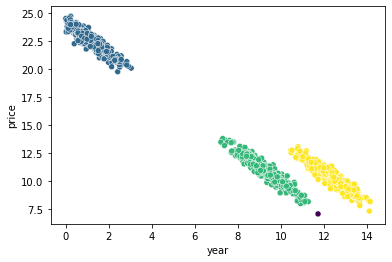

In [31]:
# Задание 7.4

df = pd.read_csv('/home/aleksandr/Документы/GitHub/data/ML4/housing.csv')

clustering = DBSCAN(eps=0.7, min_samples=6).fit(df[['year', 'price']])
sns.scatterplot(df.year, df.price, c=clustering.labels_)

# <center> 9. PCA и t-SNE, или зачем понижать размерность?

Задача снижения размерности — это задача преобразования данных с целью уменьшения количества признаков, которые описывают объект.

### PCA

Метод главных компонент, или PCA (Principal Components Analysis) — это один из базовых способов уменьшения размерности.
Данный метод имеет широкое применение:
- Подавление шума на изображениях.
- Индексация видео для быстрого поиска по базе.
- Уменьшение размерности данных с целью их дальнейшего использования в ML-моделях

Для уменьшения размерности метод главных компонент проводит линейное преобразование пространства, которое сохраняет длины векторов. Таким образом происходит отображение признаков в новое пространство с меньшей размерностью.
В новом пространстве появляются новые оси. Они строятся таким образом, что для первой оси дисперсия данных должна быть максимальной, а вторая ось ортогональна первой и имеет максимально возможную дисперсию.
Первой главной компонентой будет называться первая ось в новом пространстве.

In [ ]:
# Пример
# из модуля decomposition библиотеки sklearn импортируем класс PCA
from sklearn.decomposition import PCA
# создаём объект класса PCA
# n_components — задаём количество компонентов для проведения трансформации
pca = PCA(n_components=2, random_state=42)
# обучаем модель на данных X
pca.fit(X)
# применяем уменьшение размерности к матрице X
pca.transform(X)
# мы можем сразу обучить модель и применить трансформацию уменьшения размерности:
pca.fit_transform(X)

In [1]:
# обучим модель, которая по пикселям изображения предсказывает, что за цифра на нём изображена.
# загрузим датасет MNIST
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

dataset = fetch_openml("mnist_784")
# загрузим признаки в переменную X  
X = dataset['data']
# загрузим «ответы» в переменную y
y = dataset['target']
# разделим данные с помощью sklearn на данные для обучения и теста
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=0)

# импортируем StandardScaler для стандартизации данных
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
# трансформируем датасеты train_x и test_x
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# импортируем класс PCA
from sklearn.decomposition import PCA

# создадим объект класса PCA
pca = PCA(n_components=300)
pca.fit(train_x)
# уменьшим размерность данных
train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

In [2]:
print(len(train_x[0]))
print(len(train_x_pca[0]))

784
300


In [3]:
# Обучим модель логистической регрессии, которая на вход будет принимать пиксели изображения и предсказывать, что на нём нарисовано.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# напишем функцию, которая на вход принимает X и y, а возвращает модель и время
def get_time_and_accuracy(train_x, train_y, test_x, test_y):
    # создадим объект класса LogisticRegression
    log_reg_model = LogisticRegression(max_iter=1000)
    from time import time
    # запишем время с начала эпохи в секундах до обучения модели
    start_time = time()
    # обучим модель
    log_reg_model.fit(train_x, train_y)    
    # запишем время с начала эпохи в секундах после обучения
    end_time = time()
    # подсчитаем время, потраченное на обучение модели
    time = end_time-start_time
    # предскажем на тестовых данных
    y_pred = log_reg_model.predict(test_x)
    # посчитаем скор для тестового предсказания
    score = accuracy_score(test_y, y_pred)
    # вернём время, потраченное на обучение, и качество полученной модели
    return time, score

model_pca_time, model_pca_acc = get_time_and_accuracy(train_x_pca, train_y, test_x_pca, test_y)
print(f"Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения {model_pca_time}, метрика модели {model_pca_acc}")

model_time, model_acc = get_time_and_accuracy(train_x, train_y, test_x, test_y)
print(f"Модель, построенная на всех исходных признаках. Время обучения {model_time}, метрика модели {model_acc}")

Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 63.117594718933105, метрика модели 0.9264285714285714
Модель, построенная на всех исходных признаках. Время обучения 131.2183575630188, метрика модели 0.9187142857142857


### T-SNE

Кейс: чтобы визуализировать многомерное пространство признаков, необходимо уменьшить его размерность до двухмерного или трёхмерного. В этом поможет t-SNE (t-distributed Stochastic Neighbor Embedding), что переводится с английского как «стохастическое вложение соседей с t-распределением». 

t-SNE, в отличие от PCA, использует технику нелинейного снижения размерности данных. Обычно используется снижение размерности многомерного пространства до двух- или трёхмерного с целью дальнейшей визуализации. При преобразовании похожие объекты оказываются рядом, а непохожие — далеко друг от друга.

Алгоритм состоит из следующих шагов:
1. В исходном многомерном пространстве для каждого объекта из датасета рассчитываем евклидово расстояние между объектами. Далее с помощью нормального распределения попарно сравниваем объекты датасета. На основе этих значений строится матрица, которая содержит значения схожести объектов
2. На втором шаге мы уменьшаем размерность данных. Здесь мы случайным образом проецируем объекты из двухмерного пространства на ось x. Далее, как и на первом шаге, мы считаем схожесть объектов в новом пространстве, но для подсчёта используем не нормальное распределение, а t-распределение. После этого строим матрицу попарной схожести объектов:
3. Далее необходимо создать новую матрицу сходства, которая будет похожа на исходную:

In [ ]:
# Пример как запустить T-SNE
# импортируем класс TSNE из модуля manifold библиотеки sklearn
from sklearn.manifold import TSNE

# создаём объект класса TSNE
# n_components — размерность нового пространства
# perplexity — Этот параметр описывает ожидаемую плотность вокруг точки. Таким образом мы можем устанавливать соотношение ближайших соседей к точке. Если датасет большой, стоит установить большее значение perplexity. Обычно используют значения в диапазоне от 5 до 50.
# n_iter — количество итераций для оптимизации.
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X
tsne.fit(X)
# применяем уменьшение размерности к матрице X
tsne.transform(X)

<AxesSubplot:xlabel='0', ylabel='1'>

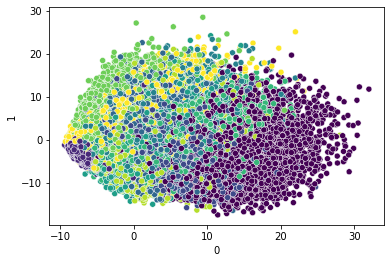

In [5]:
# Уменьшим размерность с помощью PCA:

import seaborn as sns
import pandas as pd

# создадим объект класса PCA, уменьшим размерность данных до 2
pca = PCA(n_components=2, random_state=42)

# уменьшим размерность данных
x_reduced = pca.fit_transform(train_x)
# сохраним данные в датафрейм
df_pca = pd.DataFrame(x_reduced)
# сохраним разметки кластеров
df_pca['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
# визуализируем
sns.scatterplot(x=df_pca[0], y=df_pca[1], c=df_pca['c'])

In [8]:
# Уменьшим размерность с помощью t-SNE:
from sklearn.manifold import TSNE

# создадим объект класса TSNE, уменьшим размерность данных до 2
tsne = TSNE(n_components=2, perplexity=50, n_iter=500, random_state=42)
# немного уменьшим количество объектов для уменьшения размерности, иначе алгоритм будет работать очень долго
X_reduced = tsne.fit_transform(train_x)
# сохраним данные в датафрейм
df_tsne = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_tsne['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], c=df_tsne['c'])

# <center> 10. Практика

In [9]:
import pandas as pd
from sklearn import preprocessing 

df = pd.read_csv("/home/aleksandr/Документы/GitHub/data/ML4/segmented_customers.csv")
df.head()

,customer_id,gender,age,annual_income,spending_score,cluster
0,1,1,19.0,15.0,39.0,3
1,2,1,21.0,15.0,81.0,4
2,3,0,20.0,16.0,6.0,3
3,4,0,23.0,16.0,77.0,4
4,5,0,31.0,17.0,40.0,3


In [12]:
# посмотрим, есть ли пропуски в датасете
df[df.isna().any(axis=1)]

,customer_id,gender,age,annual_income,spending_score,cluster


In [13]:
# пропусков не так много, поэтому мы можем удалить данные с пропусками
df = df.dropna()

# переименуем столбцы для более удобной работы
df.rename(columns = {'CustomerID' : 'customer_id', 'Gender' : 'gender', 
                    'Age': 'age', 'Annual Income (k$)': 'annual_income', 
                    'Spending Score (1-100)': 'spending_score', }, inplace = True)

In [14]:
# проверим, есть ли в данных дубликаты
df[df.duplicated(subset=['customer_id'])]
# Дубликатов нет, поэтому идём дальше.

,customer_id,gender,age,annual_income,spending_score,cluster


In [15]:
# Чтобы мы могли визуально оценивать результаты кластеризации, будем проводить её по трём признакам, а именно:
# годовой заработок, коэффициент покупательской способности и возраст.  
 
import plotly
import plotly.express as px

# передаём датафрейм и поля, которые нужно использовать для осей абсцисс, ординат и аппликат
fig = px.scatter_3d(
    data_frame=df, 
    x = 'age', 
    y = 'annual_income', 
    z = 'spending_score', 
    width=1000,
    height=700
)

#отображаем график
fig.show()

In [16]:
# Так как нам часто будет требоваться визуализировать результаты кластеризации, напишем для этого функцию.
# Она будет принимать датафрейм и название столбца датафрейма с результатами кластеризации.
# Так как нас будут стабильно интересовать три столбца (age, annual_income, spending_score), зафиксируем их названия внутри функции

def get_3d_visualization(df, clust_res):
    fig = px.scatter_3d(
        data_frame=df, 
        x = 'age', 
        y = 'annual_income', 
        z = 'spending_score', 
        color = clust_res,
        width=1000,
        height=700
    )

    #возвращаем график
    return fig

In [17]:
# Сохраним признаки, по которым будем проводить моделирование, в переменную X:
X = df[['age', 'annual_income', 'spending_score']]

In [23]:
# Задание 10.1  Попробуйте провести DBSCAN-кластеризацию со значениями по умолчанию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
dbscan = DBSCAN()
clustering_dbscan_res = dbscan.fit_predict(X)
df['dbscan_res_eps_11'] = clustering_dbscan_res

get_3d_visualization(df, 'dbscan_res_eps_11')

Как видно, алгоритм плохо работает с настройками по умолчанию, поэтому попробуем изменить их.

Большая часть наших данных разряжённые, а чем больше разброс точек в датасете, тем большее значение радиуса вокруг точки (eps) нужно задавать. Так как данные разряжённые, попробуем увеличить значение eps до 11 и визуально оценим результат:

In [24]:
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
dbscan = DBSCAN(eps=11)
clustering_dbscan_res = dbscan.fit_predict(X)
df['dbscan_res_eps_11'] = clustering_dbscan_res

get_3d_visualization(df, 'dbscan_res_eps_11')

Распределение данных неоднородно: в одной области они имеют высокую плотность, в другой области — разряжены. Такие данные не подходят для успешной кластеризации алгоритмом DBSCAN.

Проведём агломеративную кластеризацию, чтобы построить дендрограмму и по ней оценить количество кластеров, на которое можно разделить датасет. Напишем функцию, которая будет принимать количество кластеров и матрицу с признаками:

In [26]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# напишем функцию, которая будет проводить алгомеративную кластеризацию
# на вход она будет принимать X — матрицу с признаками для кластеризации и n_clusters — количество кластеров,
# на выходе будет возвращать список с номерами кластеров
def get_aggl_clustering(X, n_clusters):
    # запустим агломеративную кластеризацию
    agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    # обучим модель агломеративной кластеризации
    agglomerative_clustering.fit(X)
    # получим список c информацией, к какому кластеру относятся объекты
    aggl_prediction = agglomerative_clustering.labels_
    # вернём список с результатами
    return aggl_prediction

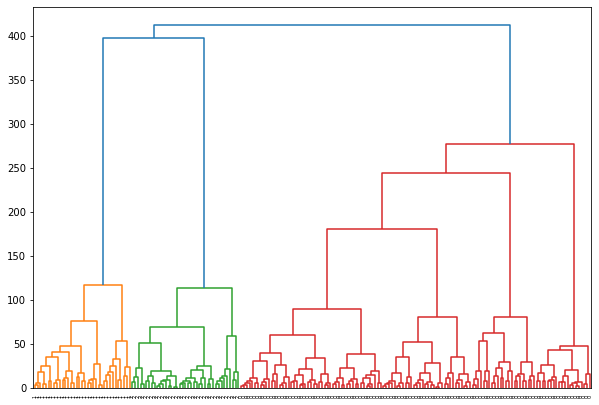

In [28]:
# Задание: проведите агломеративную кластеризацию, воспользовавшись функцией, которую мы только что написали. После этого визуализируйте полученную дендрограмму.
# Количество кластеров для кластеризации укажите равным 3 (на данном этапе это не очень важно).
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# запускаем агломеративную кластеризацию и сохраним результаты в df
df['aggl_res_3'] = get_aggl_clustering(X, 3)

linked = linkage(X, 'ward')
plt.figure(figsize=(10, 7))

dendrogram(linked,
            orientation='top',
            labels=df['aggl_res_3'].to_list(),
            distance_sort='descending',
            show_leaf_counts=True)

plt.show()

In [30]:
# Давайте визуально оценим, что из этого получилось. Для этого обучим модель агломеративной кластеризации с количеством кластеров, равным 6
df['aggl_res_6'] = get_aggl_clustering(df[['age', 'annual_income', 'spending_score']], 6)
get_3d_visualization(df, 'aggl_res_6')

Итак, кластеры разделились хорошо.

<AxesSubplot:xlabel='cluster', ylabel='silhouette'>

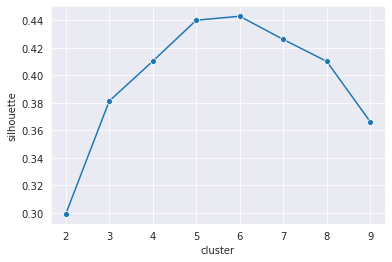

In [32]:
# Задание 10.4 Для агломеративной кластеризации самостоятельно с помощью коэффициента силуэта подберите оптимальное количество кластеров.
from sklearn.metrics import silhouette_score

# напишем функцию для подсчёта коэффициента силуэта
def get_silhouette_agg_clust(X, cluster_num):
    # проведём агломеративную кластеризацию с заданным количеством кластеров
    res = get_aggl_clustering(X, cluster_num)
    # рассчитаем коэффициент силуэта
    silhouette = silhouette_score(X, res)
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette_agg_clust(X, cluster_num))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

Как видим, пик коэффициента силуэта находится на значении 6. Таким образом, оптимальное количество кластеров — 6.

Теперь рассмотрим столбец cluster: в нём есть информация о том, к какому кластеру должен принадлежать каждый объект из датасета. Значит, мы можем проверить качество кластеризации, посчитав различные метрики.

In [33]:
from sklearn.metrics.cluster import completeness_score

print(completeness_score(labels_true=df.cluster, labels_pred=df.aggl_res_6))

0.9858363091910892


Судя по значению метрики, кластеризация проведена отлично: кластеры получились наполненными элементами, а значит данные результаты можно дальше использовать для анализа.